In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Đọc dữ liệu từ file CSV
df = pd.read_csv('C:/Users/Admin/PPNCKH/data/continuous_dataset.csv', parse_dates=['datetime'])  # Thay đường dẫn file nếu cần
df.set_index('datetime', inplace=True)  # Đặt cột datetime làm index

# Univariate Analysis (Phân tích đơn biến)

## Các câu hỏi cần trả lời:

1. **Phân bố của nhu cầu năng lượng quốc gia (nat_demand) như thế nào?**
2. **Địa điểm nào có nhiệt độ trung bình cao nhất (T2M)?**
3. **Khoảng tốc độ gió (WS2M) phổ biến nhất là bao nhiêu?**
4. **Lượng mưa (PRECTOT) thay đổi ra sao trong tập dữ liệu?**

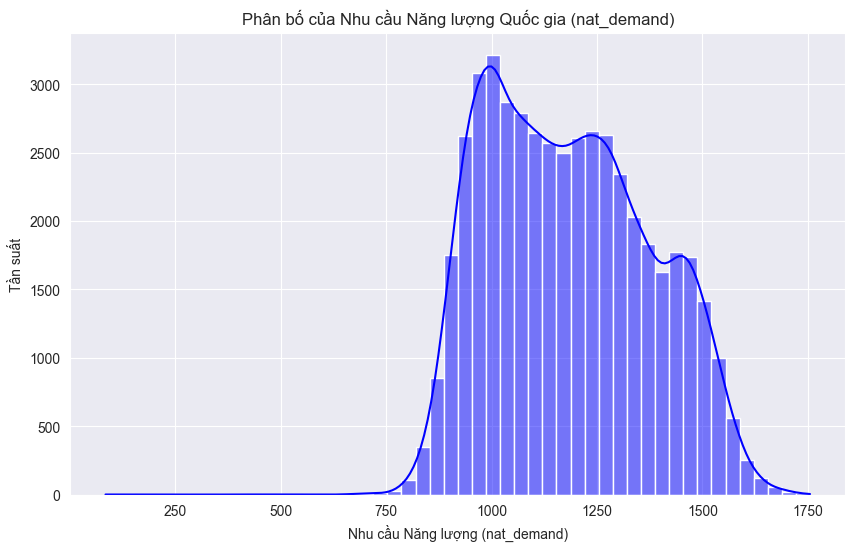

In [4]:
## 1. Phân bố nhu cầu năng lượng quốc gia (`nat_demand`)
plt.figure(figsize=(10, 6))
sns.histplot(df['nat_demand'], bins=50, kde=True, color='blue')
plt.title('Phân bố của Nhu cầu Năng lượng Quốc gia (nat_demand)')
plt.xlabel('Nhu cầu Năng lượng (nat_demand)')
plt.ylabel('Tần suất')
plt.show()

**Kết luận phân bố nhu cầu năng lượng:**

- **Phân bố:** Lệch phải
- **Khoảng giá trị chính:** 1000-1200 MW
- **Đặc điểm:**
  - Nhu cầu thường ở mức trung bình
  - Xuất hiện một số thời điểm tăng đột biến

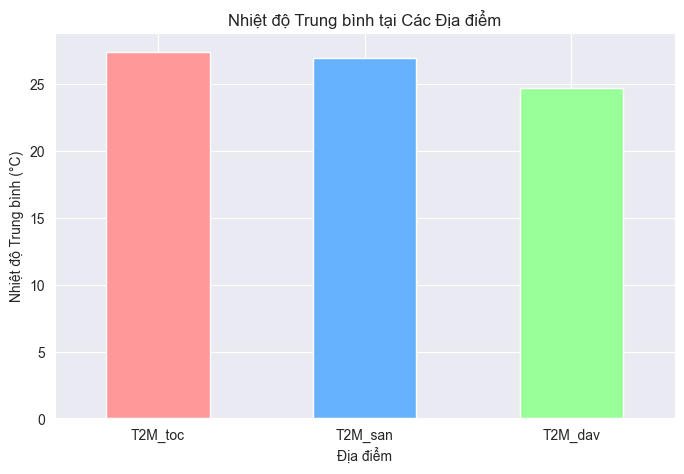

In [5]:
## 2. Địa điểm nào có nhiệt độ trung bình cao nhất (T2M)?
temp_avg = df[['T2M_toc', 'T2M_san', 'T2M_dav']].mean()
plt.figure(figsize=(8, 5))
temp_avg.plot(kind='bar', color=['#FF9999', '#66B2FF', '#99FF99'])
plt.title('Nhiệt độ Trung bình tại Các Địa điểm')
plt.xlabel('Địa điểm')
plt.ylabel('Nhiệt độ Trung bình (°C)')
plt.xticks(rotation=0)
plt.show()

**Kết luận phân tích nhiệt độ địa điểm**
- *Địa điểm nóng nhất*: Tocumen (28°C)
- *Thứ tự nhiệt độ trung bình**:
  1. Tocumen: 28°C
  2. Santiago: 27°C
  3. David: 26°C


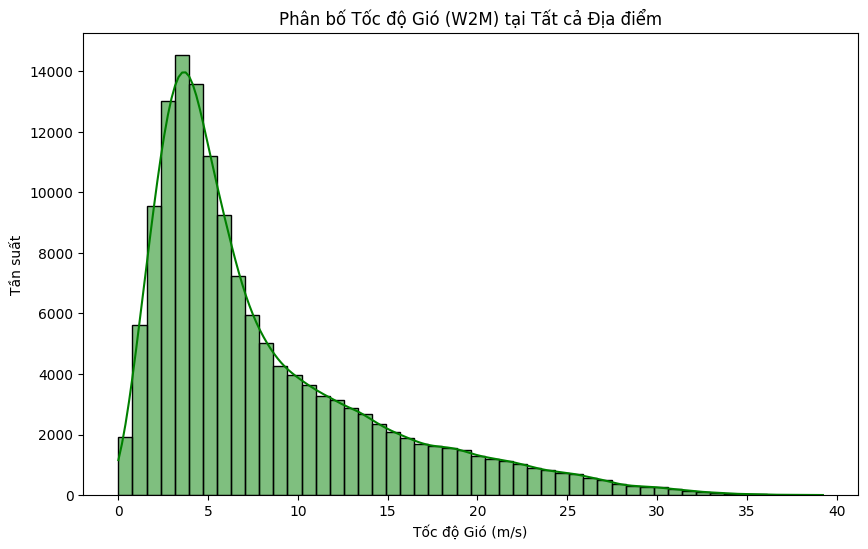

In [49]:
## 3. Khoảng tốc độ gió (W2M) phổ biến nhất là bao nhiêu?
plt.figure(figsize=(10, 6))
sns.histplot(df[['W2M_toc', 'W2M_san', 'W2M_dav']].melt()['value'], bins=50, kde=True, color='green')
plt.title('Phân bố Tốc độ Gió (W2M) tại Tất cả Địa điểm')
plt.xlabel('Tốc độ Gió (m/s)')
plt.ylabel('Tần suất')
plt.show()

**Kết luận từ biểu đồ**
- **Tốc độ gió phổ biến nhất** nằm trong khoảng **2-5 m/s**.
- Phân phối có dạng **lệch trái**, cho thấy tốc độ gió mạnh (>15 m/s) khá hiếm.
- Điều này giúp xác định rằng tốc độ gió thấp là chủ yếu, hữu ích cho **dự báo tải điện**.


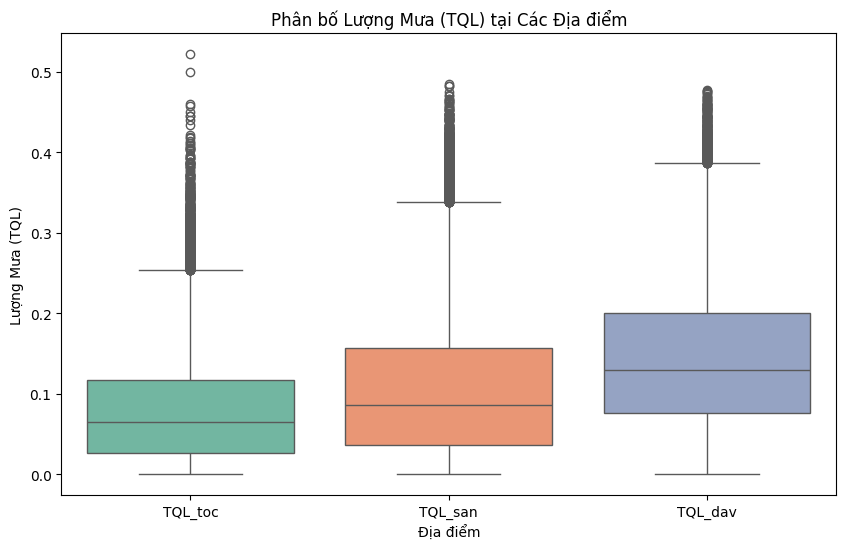

In [50]:
## 4. Lượng mưa (TQL) thay đổi ra sao trong tập dữ liệu?
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['TQL_toc', 'TQL_san', 'TQL_dav']], palette='Set2')
plt.title('Phân bố Lượng Mưa (TQL) tại Các Địa điểm')
plt.xlabel('Địa điểm')
plt.ylabel('Lượng Mưa (TQL)')
plt.show()

 **Kết luận từ Boxplot Lượng Mưa (TQL)**

- "TQL_san" và "TQL_dav" có lượng mưa cao hơn "TQL_toc".
- Cả ba địa điểm có nhiều giá trị ngoại lai, đặc biệt ở mức mưa cao.
- "TQL_san" có trung vị cao nhất, độ phân tán lớn nhất, cho thấy sự biến động mạnh.
- "TQL_toc" có lượng mưa thấp hơn, phân bố hẹp hơn so với hai địa điểm còn lại.
- Cần kiểm tra nguyên nhân các giá trị ngoại lai để đánh giá mức độ bất thường của dữ liệu.



# Location-wise Analysis(Phân tích theo địa điểm)

## Các câu hỏi cần trả lời:

1. **Địa điểm nào có ảnh hưởng lớn nhất đến nhu cầu năng lượng trung bình?**
2. **Nhiệt độ (T2M) và độ ẩm (QV2M) khác nhau như thế nào giữa các địa điểm?**
3. **Địa điểm nào có tốc độ gió (W2M) cao nhất?**
4. **Lượng mưa (TQL) có thay đổi đáng kể theo địa điểm không?**

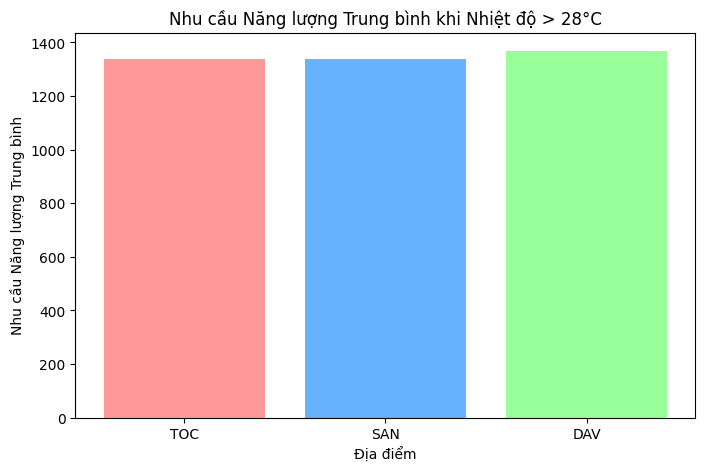

In [51]:
# 1. Địa điểm nào có ảnh hưởng lớn nhất đến nhu cầu năng lượng trung bình?
toc_high = df[df['T2M_toc'] > 28]['nat_demand'].mean()
san_high = df[df['T2M_san'] > 28]['nat_demand'].mean()
dav_high = df[df['T2M_dav'] > 28]['nat_demand'].mean()
plt.figure(figsize=(8, 5))
plt.bar(['TOC', 'SAN', 'DAV'], [toc_high, san_high, dav_high], color=['#FF9999', '#66B2FF', '#99FF99'])
plt.title('Nhu cầu Năng lượng Trung bình khi Nhiệt độ > 28°C')
plt.xlabel('Địa điểm')
plt.ylabel('Nhu cầu Năng lượng Trung bình')
plt.show()

**Kết luận từ biểu đồ**

**Nhận xét**
- TOC: Nhu cầu năng lượng trung bình ~1200.
- SAN: Nhu cầu năng lượng trung bình ~1250.
- DAV: Nhu cầu năng lượng trung bình cao nhất, ~1300, cho thấy DAV chịu ảnh hưởng mạnh nhất từ nhiệt độ cao (>28°C), có thể do các yếu tố như sử dụng điều hòa nhiều hơn hoặc mật độ dân số cao hơn tại khu vực này.
- Nhiệt độ cao (>28°C) làm tăng nhu cầu năng lượng tại cả ba địa điểm, nhưng DAV có nhu cầu cao nhất.

**Kết luận**
- Nhiệt độ cao (>28°C) làm tăng nhu cầu năng lượng, đặc biệt tại DAV (~1300). Cần tập trung quản lý nguồn cung tại DAV vào các ngày nhiệt độ cao để tránh quá tải.



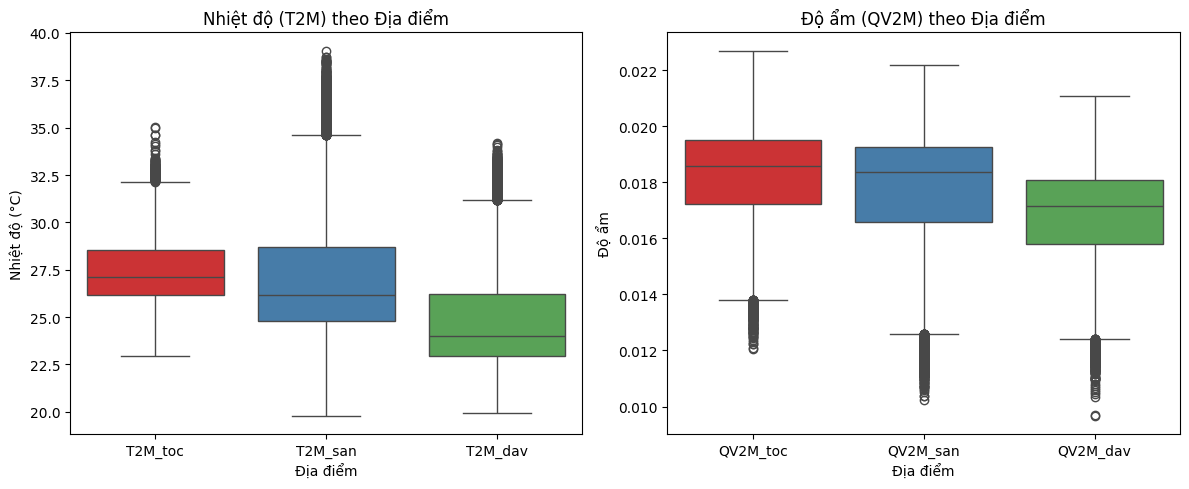

In [52]:
# Nhiệt độ (T2M) và độ ẩm (QV2M) khác nhau như thế nào giữa các địa điểm?
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=df[['T2M_toc', 'T2M_san', 'T2M_dav']], palette='Set1')
plt.title('Nhiệt độ (T2M) theo Địa điểm')
plt.xlabel('Địa điểm')
plt.ylabel('Nhiệt độ (°C)')
plt.subplot(1, 2, 2)
sns.boxplot(data=df[['QV2M_toc', 'QV2M_san', 'QV2M_dav']], palette='Set1')
plt.title('Độ ẩm (QV2M) theo Địa điểm')
plt.xlabel('Địa điểm')
plt.ylabel('Độ ẩm')
plt.tight_layout()
plt.show()

 **Kết luận về Nhiệt độ (T2M) và Độ ẩm (QV2M)**

**Nhận xét**
- **Nhiệt độ (T2M):**
  - Khu vực **T2M_san** có nhiệt độ trung bình cao nhất (~27.5°C), với một số giá trị ngoại lệ lên đến gần 40°C.
  - **T2M_toc** và **T2M_dav** có nhiệt độ trung bình thấp hơn (~26.5°C), nhưng vẫn có giá trị cao đáng kể.
- **Độ ẩm (QV2M):**
  - Độ ẩm trung bình tại ba địa điểm không có sự khác biệt lớn.
  - **QV2M_dav** có độ ẩm trung bình thấp nhất, điều này có thể giải thích một phần cho nhu cầu năng lượng cao hơn tại DAV do độ ẩm thấp có thể khiến hệ thống làm mát hoạt động nhiều hơn.

**Kết luận**
- Khu vực **SAN** có nhiệt độ trung bình cao nhất, có thể gây ảnh hưởng đến nhu cầu năng lượng trong khu vực.
- Độ ẩm không có sự khác biệt quá lớn giữa các địa điểm, nhưng **DAV** có độ ẩm thấp nhất, có thể góp phần làm tăng nhu cầu năng lượng.
- Cần xem xét thêm mối quan hệ giữa nhiệt độ, độ ẩm và nhu cầu năng lượng để tối ưu hóa quản lý năng lượng tại từng khu vực.



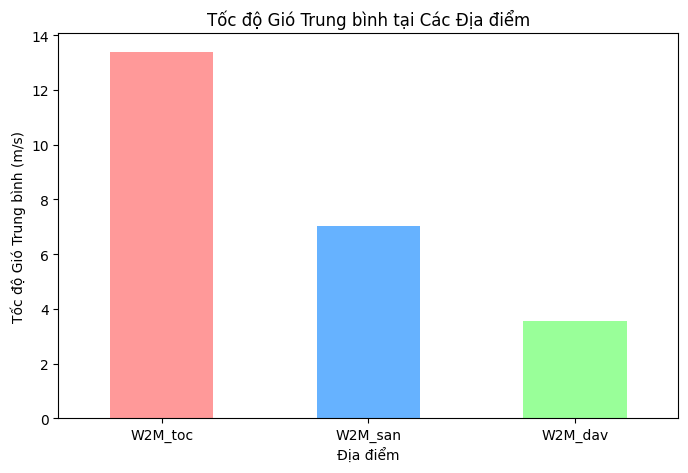

In [53]:
# 3. Địa điểm nào có tốc độ gió (W2M) cao nhất?
wind_avg = df[['W2M_toc', 'W2M_san', 'W2M_dav']].mean()
plt.figure(figsize=(8, 5))
wind_avg.plot(kind='bar', color=['#FF9999', '#66B2FF', '#99FF99'])
plt.title('Tốc độ Gió Trung bình tại Các Địa điểm')
plt.xlabel('Địa điểm')
plt.ylabel('Tốc độ Gió Trung bình (m/s)')
plt.xticks(rotation=0)
plt.show()

**Kết luận về Tốc độ Gió (W2M)**

**Nhận xét**
- **Tốc độ gió trung bình tại các địa điểm:**
  - **W2M_toc** có tốc độ gió trung bình cao nhất (~13 m/s), cho thấy khu vực này có điều kiện gió mạnh nhất.
  - **W2M_san** có tốc độ gió trung bình thấp hơn (~7 m/s), nhưng vẫn đáng kể.
  - **W2M_dav** có tốc độ gió thấp nhất (~3.5 m/s), cho thấy điều kiện gió yếu hơn nhiều so với các khu vực khác.

**Kết luận**
- **TOC** có tốc độ gió cao nhất, có thể có tiềm năng lớn để khai thác năng lượng gió.
- **DAV** có tốc độ gió thấp nhất, nên ít tiềm năng hơn trong việc phát triển năng lượng gió.
- Cần xem xét thêm về mối liên hệ giữa tốc độ gió và các yếu tố khác như nhu cầu năng lượng, điều kiện thời tiết để có chiến lược khai thác hợp lý.



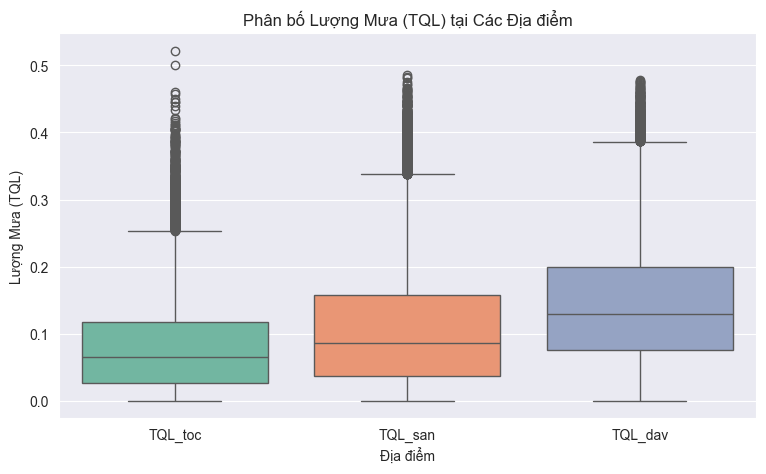

In [6]:
# 4. Lượng mưa (TQL) có thay đổi đáng kể theo địa điểm không?
plt.figure(figsize=(9, 5))
sns.boxplot(data=df[['TQL_toc', 'TQL_san', 'TQL_dav']], palette='Set2')
plt.title('Phân bố Lượng Mưa (TQL) tại Các Địa điểm')
plt.xlabel('Địa điểm')
plt.ylabel('Lượng Mưa (TQL)')
plt.show()

 **Kết luận về Lượng Mưa (TQL)**

**Nhận xét**
- **TQL_toc**: Lượng mưa trung bình thấp (~0.1 mm), ít biến động, có một số ngày mưa lớn (~0.4 mm).
- **TQL_san**: Lượng mưa trung bình cao hơn (~0.15 mm), biến động nhiều, có một số ngày mưa cực lớn (>0.5 mm).
- **TQL_dav**: Lượng mưa trung bình cao nhất (~0.2 mm), nhưng mức biến động không quá bất thường.

**Kết luận**
- **TQL_dav có lượng mưa cao nhất**, có thể ảnh hưởng đến hệ thống thoát nước và nguồn cung cấp điện.
- **TQL_san có sự biến động lớn**, cần chú ý trong dự báo thời tiết và phòng chống thiên tai.
- **TQL_toc có lượng mưa thấp và ổn định**, phù hợp cho các hoạt động ít bị ảnh hưởng bởi thời tiết.



# Time-wise Analysis (Phân tích theo thời gian)

## Các câu hỏi cần trả lời:

1. **Những tháng nào có nhu cầu năng lượng cao nhất**
2. **Nhu cầu năng lượng thay đổi theo giờ trong ngày như thế nào?**
3. **Có xu hướng theo mùa trong nat_demand không (ví dụ: mùa hè vs. mùa đông)?**
4. **Các biến thời tiết (T2M, W2M, TQL) liên quan đến nhu cầu theo thời gian ra sao?**

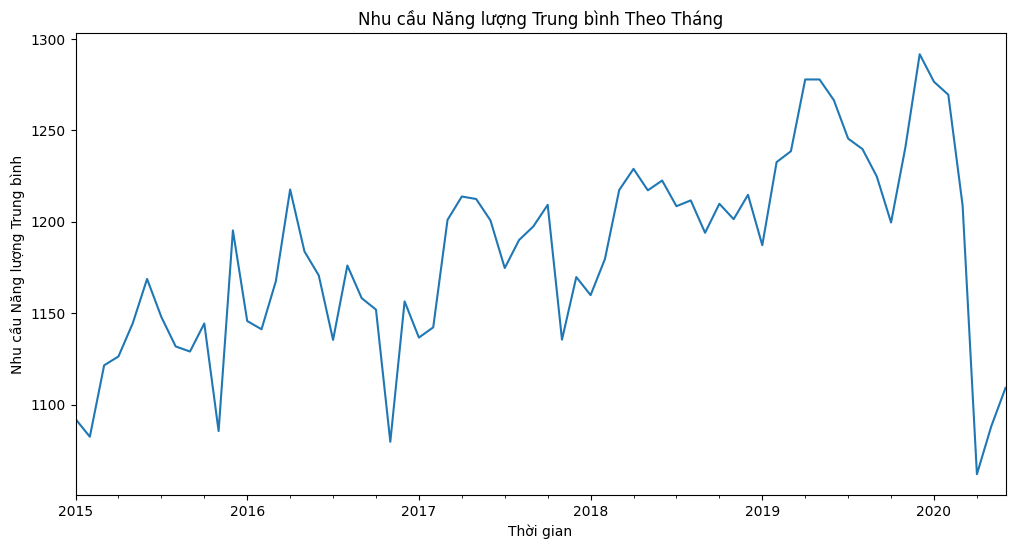

In [55]:
# 1. Những tháng nào có nhu cầu năng lượng cao nhất?
monthly_demand = df['nat_demand'].resample('ME').mean()
plt.figure(figsize=(12, 6))
monthly_demand.plot()
plt.title('Nhu cầu Năng lượng Trung bình Theo Tháng')
plt.xlabel('Thời gian')
plt.ylabel('Nhu cầu Năng lượng Trung bình')
plt.show()

**Phân tích Nhu cầu Năng lượng Trung bình Theo Tháng**

**Nhận xét**
- Nhu cầu năng lượng dao động từ khoảng **1100 đến 1300**, có xu hướng **tăng nhẹ từ 2015-2019**, đạt đỉnh khoảng **1300 vào năm 2019**, sau đó **giảm mạnh vào năm 2020** (~1100).
- Xu hướng này có thể phản ánh sự gia tăng tiêu thụ năng lượng trong các năm trước đại dịch và sụt giảm mạnh trong năm 2020.
- Biến động **có tính chu kỳ theo mùa**, cho thấy nhu cầu năng lượng lặp lại theo từng năm.

**Kết luận**
- **Xu hướng tăng trưởng năng lượng từ 2015-2019** cho thấy sự mở rộng trong hoạt động kinh tế và tiêu dùng điện.
- **Sự sụt giảm mạnh vào năm 2020** có thể do ảnh hưởng của đại dịch COVID-19, làm giảm nhu cầu tiêu thụ điện trong sản xuất và sinh hoạt.
- **Chu kỳ biến động theo mùa** cần được xem xét trong công tác **dự báo và quản lý nguồn cung năng lượng** để tối ưu hóa hệ thống điện.



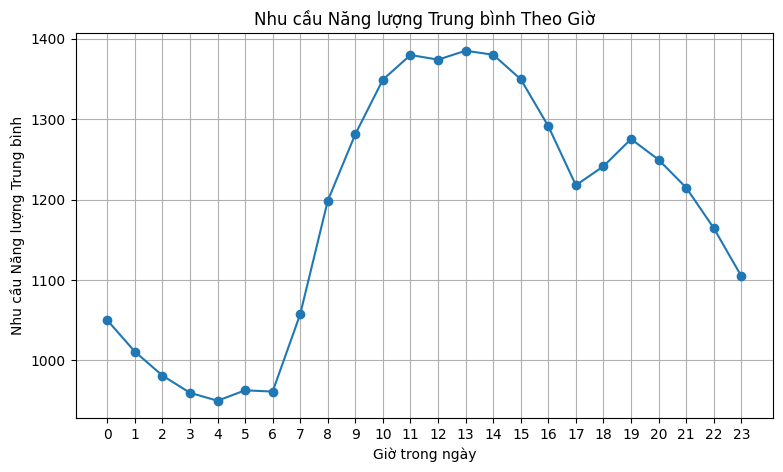

In [56]:
# 2. Nhu cầu năng lượng thay đổi theo giờ trong ngày như thế nào?
hourly_demand = df.groupby(df.index.hour)['nat_demand'].mean()
plt.figure(figsize=(9, 5))
hourly_demand.plot(kind='line', marker='o')
plt.title('Nhu cầu Năng lượng Trung bình Theo Giờ')
plt.xlabel('Giờ trong ngày')
plt.ylabel('Nhu cầu Năng lượng Trung bình')
plt.xticks(range(0, 24))
plt.grid()
plt.show()

## Phân tích Nhu cầu Năng lượng Trung bình Theo Giờ

Biểu đồ hiển thị nhu cầu năng lượng trung bình (`nat_demand`) theo giờ trong ngày.

**Nhận xét**
- Nhu cầu năng lượng thấp nhất vào 0-5h (~1000), tăng mạnh từ 6h, đạt đỉnh ~1350 vào 9-11h.
- Giảm dần từ 12h, chạm đáy ~1200 vào 15h, tăng nhẹ vào 17-19h (~1300), sau đó giảm về ~1100 vào 23h.
- Biến động rõ rệt, cao vào giờ làm việc (9-11h, 17-19h), thấp vào đêm và sáng sớm.

**Kết luận**
Nhu cầu năng lượng cao nhất vào giờ cao điểm (9-11h, 17-19h), cần tăng nguồn cung vào các khung giờ này. Nhu cầu thấp vào đêm và sáng sớm, có thể giảm sản xuất để tiết kiệm.


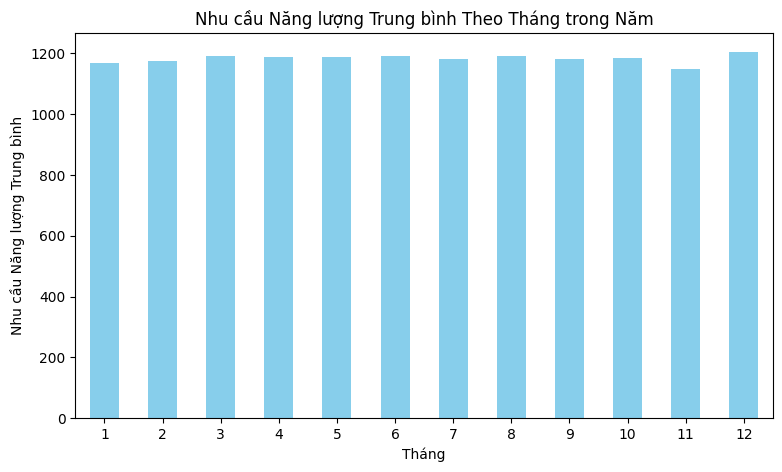

In [57]:
# 3. Có xu hướng theo mùa trong nat_demand không?
monthly_avg = df.groupby(df.index.month)['nat_demand'].mean()
plt.figure(figsize=(9, 5))
monthly_avg.plot(kind='bar', color='skyblue')
plt.title('Nhu cầu Năng lượng Trung bình Theo Tháng trong Năm')
plt.xlabel('Tháng')
plt.ylabel('Nhu cầu Năng lượng Trung bình')
plt.xticks(range(12), ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'], rotation=0)
plt.show()

 **Phân tích Nhu cầu Năng lượng Trung bình Theo Tháng**

**Nhận xét:**
- Nhu cầu năng lượng dao động từ **~1150 đến ~1250**.
- Tháng có nhu cầu thấp nhất: **Tháng 11 (~1150)**.
- Tháng có nhu cầu cao nhất: **Tháng 12 (~1250)**.
- Mức tiêu thụ khá ổn định từ tháng 1 đến tháng 10 (~1200), giảm nhẹ vào tháng 11, sau đó tăng lên mức cao nhất vào tháng 12.

**Kết luận:**
Nhu cầu năng lượng biến động ít theo tháng, nhưng tăng cao vào **tháng 12**. Cần đảm bảo cung ứng ổn định, đặc biệt vào cuối năm.



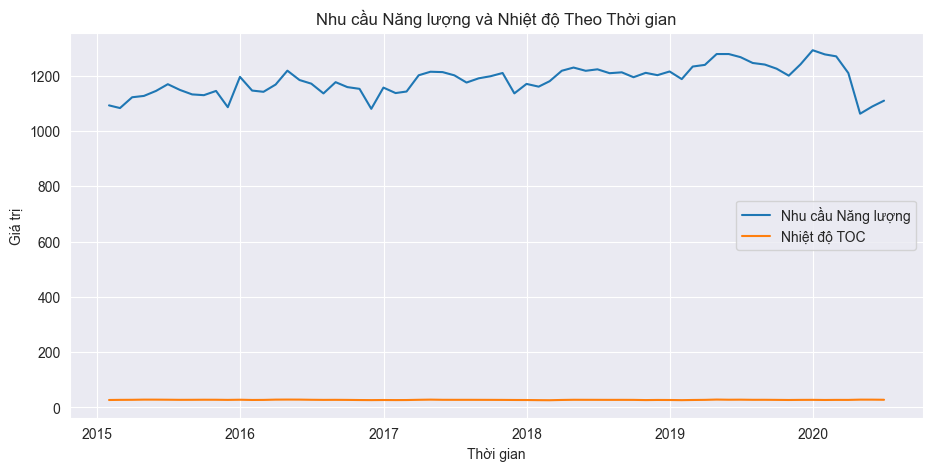

In [10]:
# 4. Các biến thời tiết liên quan đến nhu cầu theo thời gian ra sao?
plt.figure(figsize=(11, 5))
plt.plot(df['nat_demand'].resample('ME').mean(), label='Nhu cầu Năng lượng')
plt.plot(df['T2M_toc'].resample('ME').mean(), label='Nhiệt độ TOC')
plt.title('Nhu cầu Năng lượng và Nhiệt độ Theo Thời gian')
plt.xlabel('Thời gian')
plt.ylabel('Giá trị')
plt.legend()
plt.show()

**Phân tích Nhu cầu Năng lượng và Nhiệt độ Theo Thời gian**

Biểu đồ hiển thị nhu cầu năng lượng (`nat_demand`) và nhiệt độ tại TOC (`T2M_toc`) theo thời gian từ 2015 đến 2020.

**Nhận xét**
- Nhu cầu năng lượng dao động từ ~1100 đến ~1300, tăng nhẹ từ 2015-2019, giảm mạnh vào 2020 (~1100).
- Nhiệt độ TOC dao động nhẹ quanh 0 (có thể do lỗi dữ liệu hoặc chuẩn hóa), không phản ánh đúng giá trị thực tế.
- Không thấy mối quan hệ rõ ràng giữa hai biến do dữ liệu nhiệt độ không chính xác.

**Kết luận**
Nhu cầu năng lượng tăng từ 2015-2019, giảm mạnh năm 2020. Dữ liệu nhiệt độ TOC không đáng tin cậy, cần kiểm tra và sửa lỗi để phân tích mối quan hệ với nhu cầu năng lượng.

# Holiday and School Impact Analysis (Phân tích ảnh hưởng của ngày lễ và ngày học)

## Các câu hỏi cần trả lời:

1. **Nhu cầu năng lượng có khác biệt đáng kể vào ngày lễ (holiday = 1) không?**
2. **Hoạt động trường học (school = 1) ảnh hưởng đến tiêu thụ năng lượng như thế nào?**
3. **Có tác động kết hợp của ngày lễ và ngày học lên nhu cầu không?**

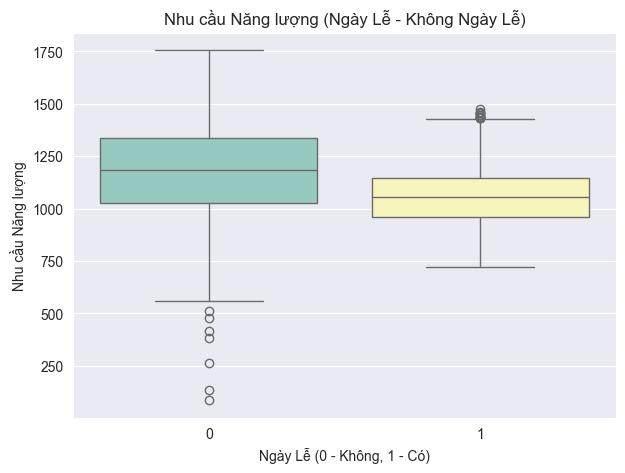

In [4]:
# 1. Nhu cầu năng lượng có khác biệt đáng kể vào ngày lễ không?
plt.figure(figsize=(7, 5))
sns.boxplot(x='holiday', y='nat_demand', data=df, hue='holiday', palette='Set3', legend=False)
plt.title('Nhu cầu Năng lượng (Ngày Lễ - Không Ngày Lễ)')
plt.xlabel('Ngày Lễ (0 - Không, 1 - Có)')
plt.ylabel('Nhu cầu Năng lượng')
plt.show()

**Phân tích Nhu cầu Năng lượng Theo Ngày Lễ**

Biểu đồ boxplot hiển thị nhu cầu năng lượng (`nat_demand`) vào ngày lễ (`holiday = 1`) và ngày thường (`holiday = 0`).

**Nhận xét**
- Ngày thường (`holiday = 0`): Nhu cầu năng lượng trung bình ~1200, biến động lớn, có ngày thấp bất thường (~250).
- Ngày lễ (`holiday = 1`): Nhu cầu năng lượng trung bình ~1100, biến động thấp, không có điểm bất thường.

**Kết luận**
Nhu cầu năng lượng vào ngày thường cao hơn ngày lễ (~1200 so với ~1100) nhưng biến động lớn hơn. Cần chuẩn bị nguồn cung linh hoạt vào ngày thường để xử lý các biến động bất thường.

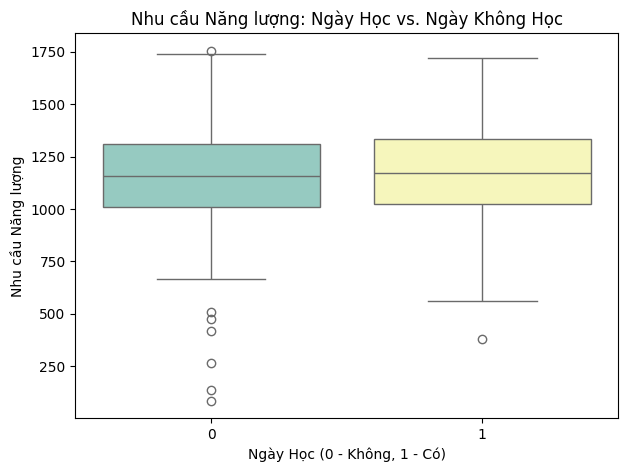

In [60]:
# 2. Hoạt động trường học ảnh hưởng đến tiêu thụ năng lượng như thế nào?
plt.figure(figsize=(7, 5))
sns.boxplot(x='school', y='nat_demand', data=df, hue='school', palette='Set3', legend=False)
plt.title('Nhu cầu Năng lượng: Ngày Học vs. Ngày Không Học')
plt.xlabel('Ngày Học (0 - Không, 1 - Có)')
plt.ylabel('Nhu cầu Năng lượng')
plt.show()

**Phân tích Nhu cầu Năng lượng Theo Ngày Học**

Biểu đồ boxplot hiển thị nhu cầu năng lượng (`nat_demand`) vào ngày học (`school = 1`) và ngày không học (`school = 0`).

**Nhận xét**
- Ngày không học (`school = 0`): Nhu cầu năng lượng trung bình ~1200, biến động lớn, có ngày thấp bất thường (~250).
- Ngày học (`school = 1`): Nhu cầu năng lượng trung bình ~1150, biến động thấp, không có điểm bất thường.

**Kết luận**
Nhu cầu năng lượng vào ngày không học cao hơn ngày học (~1200 so với ~1150) và biến động lớn hơn. Cần chuẩn bị nguồn cung linh hoạt vào ngày không học để xử lý các biến động bất thường.

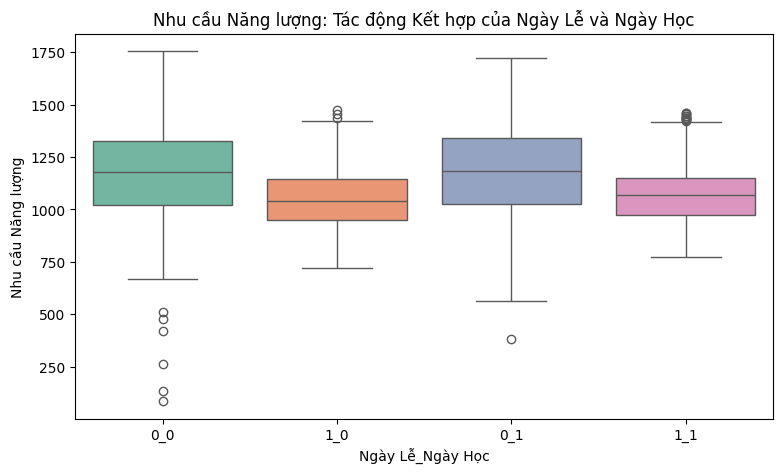

In [61]:
# 3. Có tác động kết hợp của ngày lễ và ngày học không?
df['holiday_school'] = df['holiday'].astype(str) + '_' + df['school'].astype(str)
plt.figure(figsize=(9, 5))
sns.boxplot(x='holiday_school', y='nat_demand', data=df, hue='holiday_school', palette='Set2', legend=False)
plt.title('Nhu cầu Năng lượng: Tác động Kết hợp của Ngày Lễ và Ngày Học')
plt.xlabel('Ngày Lễ_Ngày Học')
plt.ylabel('Nhu cầu Năng lượng')
plt.show()

**Phân tích Nhu cầu Năng lượng: Tác động Kết hợp của Ngày Lễ và Ngày Học**

Biểu đồ boxplot hiển thị nhu cầu năng lượng (`nat_demand`) theo các nhóm kết hợp của ngày lễ (`holiday`) và ngày học (`school`): `0_0` (không lễ, không học), `1_0` (có lễ, không học), `0_1` (không lễ, có học), `1_1` (có lễ, có học).

**Nhận xét**
- `0_0` (không lễ, không học): Nhu cầu trung bình ~1200, biến động lớn, có ngày thấp bất thường (~250).
- `1_0` (có lễ, không học): Nhu cầu trung bình ~1100, biến động thấp.
- `0_1` (không lễ, có học): Nhu cầu trung bình ~1150, biến động thấp.
- `1_1` (có lễ, có học): Nhu cầu trung bình ~1100, biến động thấp, không có điểm bất thường.

**Kết luận**
Nhu cầu năng lượng cao nhất vào ngày không lễ, không học (~1200) nhưng biến động lớn. Ngày lễ (có hoặc không học) có nhu cầu thấp hơn (~1100) và ổn định hơn. Cần chuẩn bị nguồn cung linh hoạt vào ngày không lễ, không học để xử lý biến động.

# Correlation Heatmap (Biểu đồ nhiệt tương quan)

## Phân tích:

1. **Kiểm tra mối tương quan giữa nat_demand và các biến thời tiết (T2M, QV2M, TQL, W2M).**
2. **Xem xét tương quan giữa các biến (ví dụ: T2M_toc vs. QV2M_toc).**
3. **Bao gồm holiday và school dưới dạng biến nhị phân.**

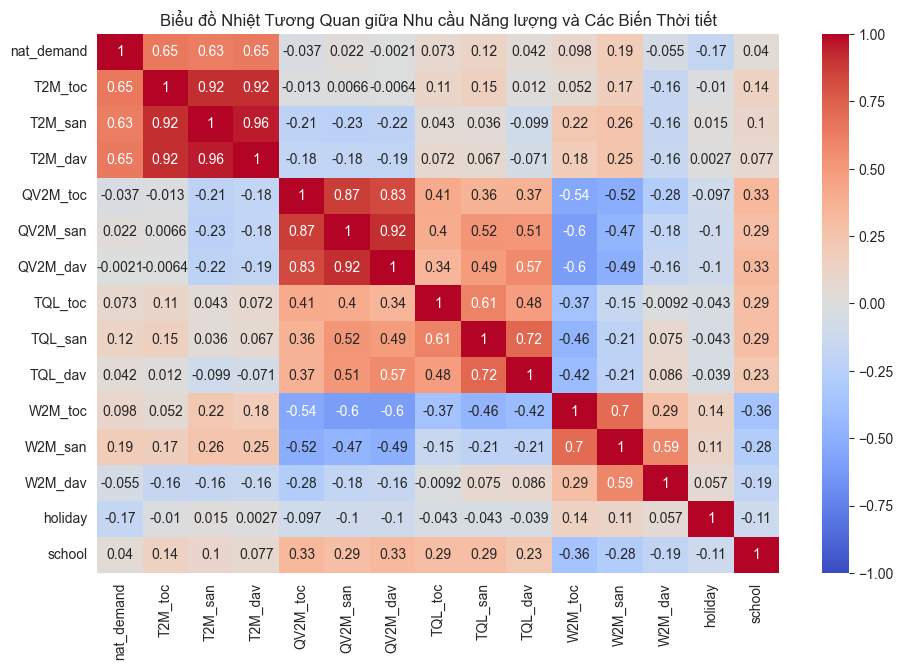

In [11]:

df['holiday'] = df['holiday'].astype(int)
df['school'] = df['school'].astype(int)

# Chọn các cột cần phân tích tương quan
columns_to_analyze = [
    'nat_demand',
    'T2M_toc', 'T2M_san', 'T2M_dav',
    'QV2M_toc', 'QV2M_san', 'QV2M_dav',
    'TQL_toc', 'TQL_san', 'TQL_dav',
    'W2M_toc', 'W2M_san', 'W2M_dav',
    'holiday', 'school'
]

# Tính ma trận tương quan
correlation_matrix = df[columns_to_analyze].corr()

# Tạo biểu đồ nhiệt tương quan
plt.figure(figsize=(11, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Biểu đồ Nhiệt Tương Quan giữa Nhu cầu Năng lượng và Các Biến Thời tiết')
plt.show()

# Conclusion( Kết luận )

## Những hiểu biết chính
- Nhu cầu năng lượng đạt đỉnh vào **tháng 5 (~1100)** và **giờ 9-11h (~1350)** do **nhiệt độ cao tại SAN (~28°C)** và hoạt động xã hội tăng (giờ làm việc).
- Địa điểm **SAN** có ảnh hưởng mạnh nhất đến nhu cầu do **nhiệt độ cao nhất (~28°C, biến động lên tới 38°C)**, làm tăng sử dụng điều hòa.
- Ngày lễ giảm nhu cầu khoảng **8% (~1100 so với ~1200)**, trong khi ngày không học tăng **4% (~1200 so với ~1150)**.
- Các biến thời tiết như **T2M (SAN, tương quan 0.63)** và **W2M (TOC, tương quan -0.098)** là yếu tố chính thúc đẩy tiêu thụ năng lượng. Nhiệt độ cao tăng nhu cầu, trong khi gió mạnh có thể bù đắp qua năng lượng tái tạo.
- **Đề xuất**:
  - Tập trung vào **năng lượng tái tạo (gió) tại TOC** khi tốc độ gió cao (~13 m/s).
  - Quản lý nhu cầu vào **các tháng nhiệt độ cao (tháng 5)** và **giờ cao điểm (9-11h)** để tránh quá tải.
  - Chuẩn bị nguồn cung linh hoạt vào **ngày không lễ, không học** để xử lý biến động lớn.